In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('50_Startups.csv')


In [2]:
# Display the first few rows of the dataset
print(data.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


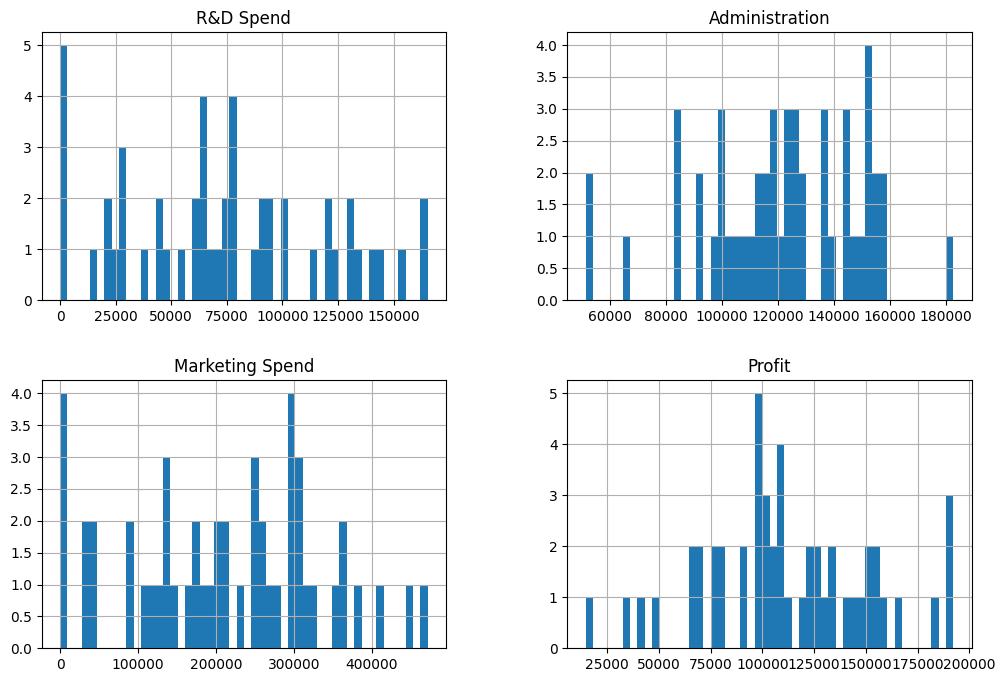

In [3]:
# Visualize the distributions of numeric columns
data.hist(bins=50, figsize=(12, 8))
plt.show()

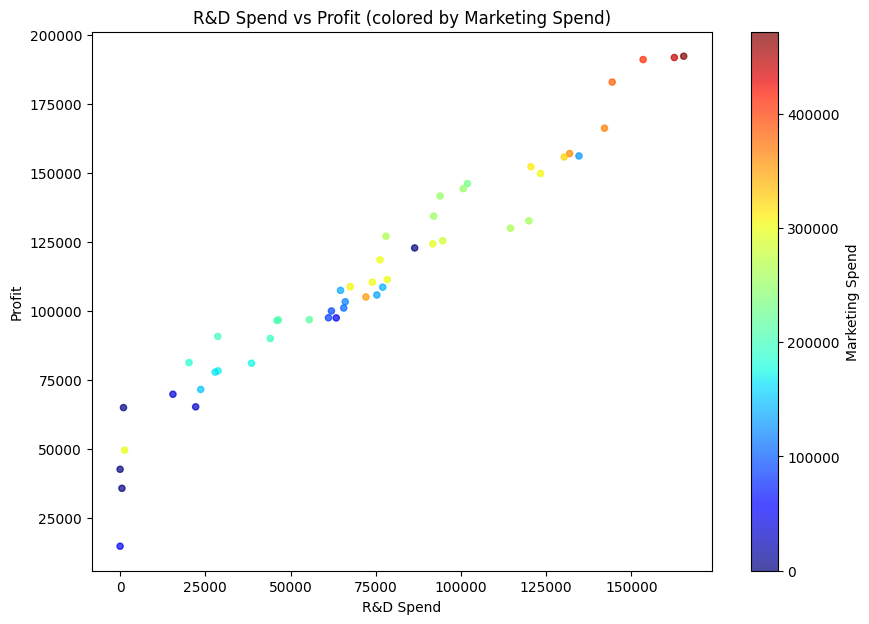

In [4]:
# Scatter plot for R&D Spend vs Profit
data.plot(kind="scatter", x="R&D Spend", y="Profit", alpha=0.7, figsize=(10, 7), c='Marketing Spend', cmap='jet', colorbar=True)
plt.title("R&D Spend vs Profit (colored by Marketing Spend)")
plt.show()


In [5]:
# Check for missing values
print(data.isna().sum())


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
# Display data types
print(data.dtypes)


R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [7]:
# Simple Linear Regression: R&D Spend vs Profit
X = data[["R&D Spend"]]
y = data["Profit"]

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train.values, y_train)


LinearRegression()

In [10]:
# Make predictions
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
# Calculate R² Score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9265108109341951


In [12]:
# Display the intercept of the model
print("Intercept:", lr.intercept_)

Intercept: 49336.6680379911


In [13]:
# Check prediction for the first instance in the dataset
print("Prediction for the first row:", lr.predict(X[0:1]))

Prediction for the first row: [190480.25107829]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
# Save and load the model
import pickle

In [15]:
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [16]:
# Load the saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [17]:
# Test loaded model
print("Loaded Model Predictions:", loaded_model.predict(X[0:5]))

Loaded Model Predictions: [190480.25107829 188131.54561896 180315.73844483 172574.27208786
 170640.7877067 ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905
